<a href="https://colab.research.google.com/github/dianicgr/An-lisis-Geoespacial/blob/main/Entrega_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import geopandas as gpd
from libpysal.weights import Queen
import pandas as pd
import numpy as np

# 1. Cargar shapefile
gdf = gpd.read_file("/content/drive/MyDrive/Analisis Geoespacial/plaguicidas_santander.gpkg", layer="cortado")

# 2. Filtrar solo los polígonos con plaguicidas == 'Si'
gdf_si = gdf[gdf['usoplaguic'] == 'Si'].reset_index(drop=True)

# Verificar que hay exactamente 27 polígonos
assert len(gdf_si) == 27, f"Esperados 27 polígonos, encontrados {len(gdf_si)}"

# 3. Crear matriz de contigüidad tipo Queen
w_queen = Queen.from_dataframe(gdf_si)
w_queen.transform = 'b'  # binaria

# 4. Obtener matriz completa NxN
matriz, ids = w_queen.full()  # matriz y lista de índices
matriz_vecindad = np.array(matriz)

# 5. Crear DataFrame para presentación clara
matriz_df = pd.DataFrame(matriz_vecindad, index=ids, columns=ids)

# 6. Imprimir la matriz completa
print("Matriz de vecindad Queen (27 x 27) – 1 = vecino, 0 = no vecino:")
print(matriz_df.to_string(index=True, header=True))


/tmp/ipython-input-2-2272962922.py:16: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = Queen.from_dataframe(gdf_si)


Matriz de vecindad Queen (27 x 27) – 1 = vecino, 0 = no vecino:
     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5   0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

/usr/local/lib/python3.11/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There are 7 islands with ids: 0, 1, 17, 23, 24, 25, 26.
  W.__init__(self, neighbors, ids=ids, **kw)


In [13]:
import geopandas as gpd
from libpysal.weights import Queen
import pandas as pd
import numpy as np

# 1. Cargar shapefile
gdf = gpd.read_file("/content/drive/MyDrive/Analisis Geoespacial/plaguicidas_santander.gpkg", layer="cortado")

# 2. Filtrar solo los polígonos con plaguicidas == 'Si'
gdf_si = gdf[gdf['usoplaguic'] == 'Si'].reset_index(drop=True)

# 3. Verificar que hay exactamente 27 polígonos
assert len(gdf_si) == 27, f"Esperados 27 polígonos, encontrados {len(gdf_si)}"

# 4. Crear matriz Queen y normalizar por filas (row-standardized)
w_queen = Queen.from_dataframe(gdf_si)
w_queen.transform = 'r'  # 'r' = row-standardized

# 5. Obtener matriz completa NxN (pesos normalizados)
matriz, ids = w_queen.full()
matriz_pesos = np.array(matriz)

# 6. Convertir a DataFrame para impresión y análisis
matriz_df = pd.DataFrame(matriz_pesos, index=ids, columns=ids)

# 7. Mostrar sumatoria de cada fila (debe ser 1.0 si hay vecinos, 0.0 si no)
suma_filas = matriz_df.sum(axis=1)
print("Suma de cada fila (debe ser 1.0 para polígonos con vecinos):")
print(suma_filas)

# 8. Mostrar la matriz completa
print("\nMatriz de pesos espaciales Queen (row-standardized):")
print(matriz_df.round(3).to_string(index=True, header=True))


/tmp/ipython-input-13-3900418153.py:16: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = Queen.from_dataframe(gdf_si)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
Suma de cada fila (debe ser 1.0 para polígonos con vecinos):
0     0.0
1     0.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    0.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    0.0
24    0.0
25    0.0
26    0.0
dtype: float64

Matriz de pesos espaciales Queen (row-standardized):
     0    1    2    3     4      5      6     7      8      9      10     11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26
0   0.0  0.0  0.0  0.0  0.00  0.000  0.000  0.00  0.000  0.000  0.000  0.000  0.0  0.0  0.0  0.0  0.

/usr/local/lib/python3.11/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There are 7 islands with ids: 0, 1, 17, 23, 24, 25, 26.
  W.__init__(self, neighbors, ids=ids, **kw)


## **Rezago Espacial**

In [4]:
# Ejecutar esta celda primero si aún no tienes libpysal
!pip install libpysal

import geopandas as gpd
from libpysal.weights import Queen, lag_spatial
import pandas as pd

# 1. Cargar y corregir geometrías multiparte
gdf = gpd.read_file("/content/drive/MyDrive/Analisis Geoespacial/Entrega_2/zonas_plaguicidas.geojson")
gdf = gdf.explode(index_parts=False).reset_index(drop=True)

# 2. Filtrar zonas con uso de plaguicidas
gdf_si = gdf[gdf['usoplaguic'] == 'Si'].reset_index(drop=True)

# 3. Crear matriz de contigüidad Queen estandarizada por filas
w_queen = Queen.from_dataframe(gdf_si)
w_queen.transform = 'r'

# 4. Calcular rezagos espaciales para las variables relevantes
variables = ['a_aguas', 'a_cultivos', 'a_otros', 'a_pastos', 'a_total']
for var in variables:
    gdf_si[f'w_{var}'] = lag_spatial(w_queen, gdf_si[var])
    gdf_si[f'{var}_std'] = (gdf_si[var] - gdf_si[var].mean()) / gdf_si[var].std()
    gdf_si[f'w_{var}_std'] = lag_spatial(w_queen, gdf_si[f'{var}_std'])

# 5. Ver resultado
gdf_si[[v for var in variables for v in (var, f'w_{var}', f'{var}_std', f'w_{var}_std')]].head()


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING:

/tmp/ipython-input-4-1751185938.py:16: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = Queen.from_dataframe(gdf_si)
/usr/local/lib/python3.11/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 59 disconnected components.
 There are 55 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 50, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74.
  W.__init__(self, neighbors, ids=ids, **kw)


,a_aguas,w_a_aguas,a_aguas_std,w_a_aguas_std,a_cultivos,w_a_cultivos,a_cultivos_std,w_a_cultivos_std,a_otros,w_a_otros,a_otros_std,w_a_otros_std,a_pastos,w_a_pastos,a_pastos_std,w_a_pastos_std,a_total,w_a_total,a_total_std,w_a_total_std
0,0.0,0.0,-0.327624,0.0,0.0,0.0,-0.490511,0.0,0.159,0.0,-0.342775,0.0,0.952,0.0,-0.26337,0.0,1.11,0.0,-0.329972,0.0
1,0.0,0.0,-0.327624,0.0,0.0,0.0,-0.490511,0.0,0.159,0.0,-0.342775,0.0,0.952,0.0,-0.26337,0.0,1.11,0.0,-0.329972,0.0
2,0.0,0.0,-0.327624,0.0,0.0,0.0,-0.490511,0.0,0.159,0.0,-0.342775,0.0,0.952,0.0,-0.26337,0.0,1.11,0.0,-0.329972,0.0
3,0.0,0.0,-0.327624,0.0,0.0,0.0,-0.490511,0.0,0.159,0.0,-0.342775,0.0,0.952,0.0,-0.26337,0.0,1.11,0.0,-0.329972,0.0
4,0.0,0.0,-0.327624,0.0,0.0,0.0,-0.490511,0.0,0.159,0.0,-0.342775,0.0,0.952,0.0,-0.26337,0.0,1.11,0.0,-0.329972,0.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 13.4 MB/s eta 0:00:00


/tmp/ipython-input-9-1457288957.py:21: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = Queen.from_dataframe(gdf_si)
/usr/local/lib/python3.11/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 59 disconnected components.
 There are 55 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 50, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING:

/usr/local/lib/python3.11/dist-packages/mapclassify/classifiers.py:1760: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self.bins = quantile(y, k=k)


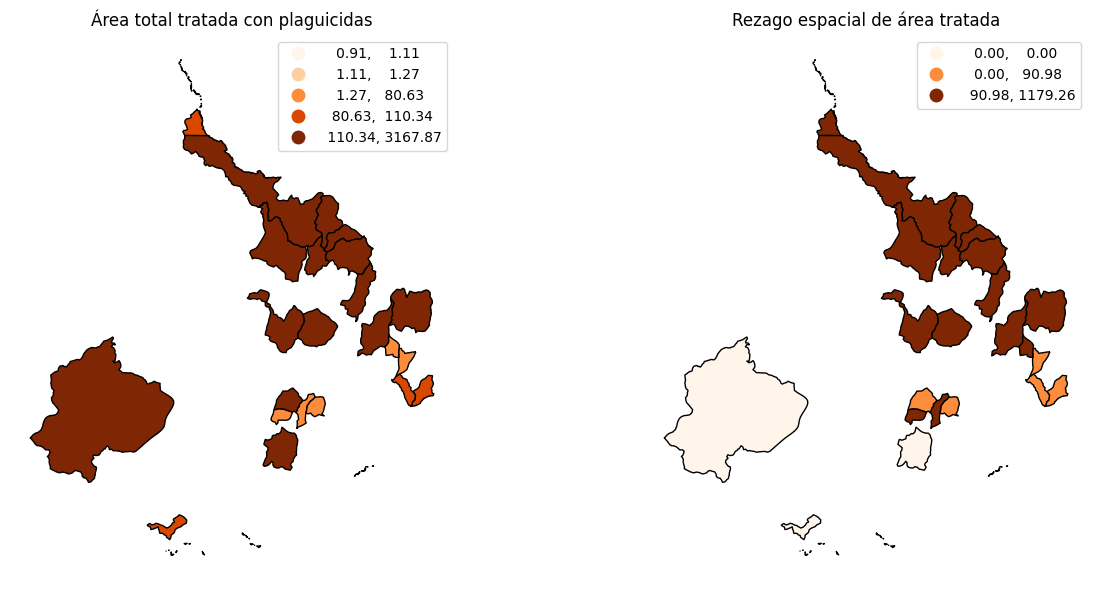

In [9]:
# Instalar si aún no tienes libpysal
!pip install libpysal
!pip install mapclassify

# Importar librerías
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from libpysal.weights import Queen, lag_spatial

# 1. Cargar archivo GeoJSON (ajusta la ruta si es necesario)
gdf = gpd.read_file("/content/drive/MyDrive/Analisis Geoespacial/Entrega_2/zonas_plaguicidas.geojson")

# 2. Corregir geometrías multiparte (MultiPolygon)
gdf = gdf.explode(index_parts=False).reset_index(drop=True)

# 3. Filtrar solo las zonas con uso de plaguicidas
gdf_si = gdf[gdf['usoplaguic'] == 'Si'].reset_index(drop=True)

# 4. Crear matriz de contigüidad Queen y estandarizar por filas
w_queen = Queen.from_dataframe(gdf_si)
w_queen.transform = 'r'

# 5. Calcular rezago espacial para 'a_total'
gdf_si['w_a_total'] = lag_spatial(w_queen, gdf_si['a_total'])

# 6. Estandarizar 'a_total' y calcular su rezago espacial
gdf_si['a_total_std'] = (gdf_si['a_total'] - gdf_si['a_total'].mean()) / gdf_si['a_total'].std()
gdf_si['w_a_total_std'] = lag_spatial(w_queen, gdf_si['a_total_std'])

# 7. Visualizar los resultados con dos mapas
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

gdf_si.plot(column='a_total', cmap='Oranges', scheme='quantiles', edgecolor='black', legend=True, ax=axs[0])
axs[0].set_title('Área total tratada con plaguicidas')
axs[0].axis('off')

gdf_si.plot(column='w_a_total', cmap='Oranges', scheme='quantiles', edgecolor='black', legend=True, ax=axs[1])
axs[1].set_title('Rezago espacial de área tratada')
axs[1].axis('off')

plt.tight_layout()
plt.show()


/tmp/ipython-input-10-2527723567.py:15: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = Queen.from_dataframe(gdf_si)
/usr/local/lib/python3.11/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 59 disconnected components.
 There are 55 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 50, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74.
  W.__init__(self, neighbors, ids=ids, **kw)
/usr/local/lib/python3.11/dist-packages/mapclassify/classifiers.py:1760: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self.bins = quantile(y, k=k)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING:

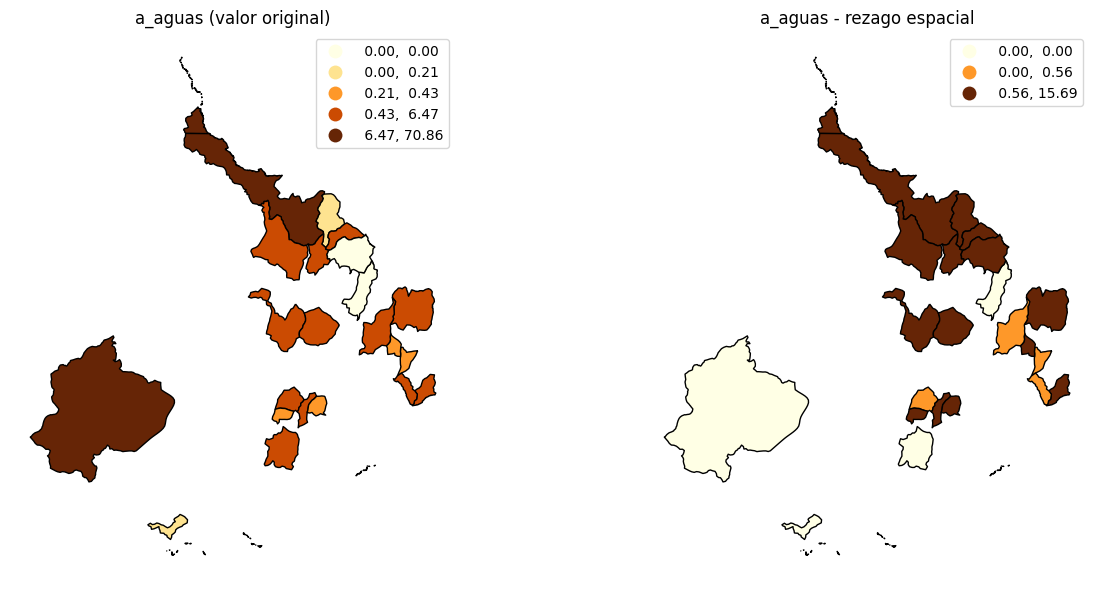

/usr/local/lib/python3.11/dist-packages/mapclassify/classifiers.py:1760: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)
/usr/local/lib/python3.11/dist-packages/mapclassify/classifiers.py:1760: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self.bins = quantile(y, k=k)


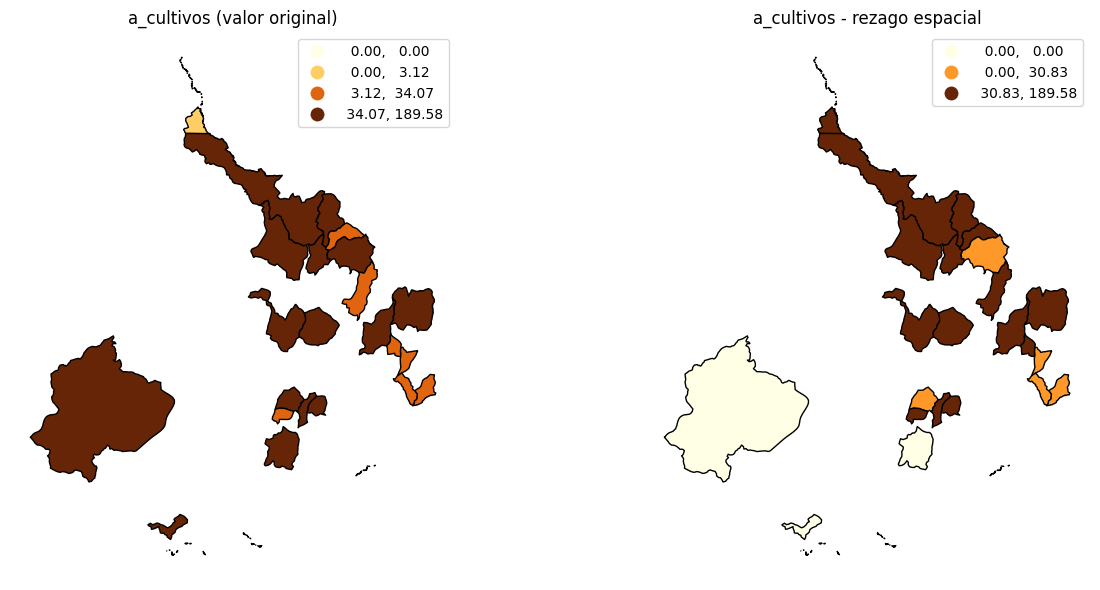

/usr/local/lib/python3.11/dist-packages/mapclassify/classifiers.py:1760: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self.bins = quantile(y, k=k)


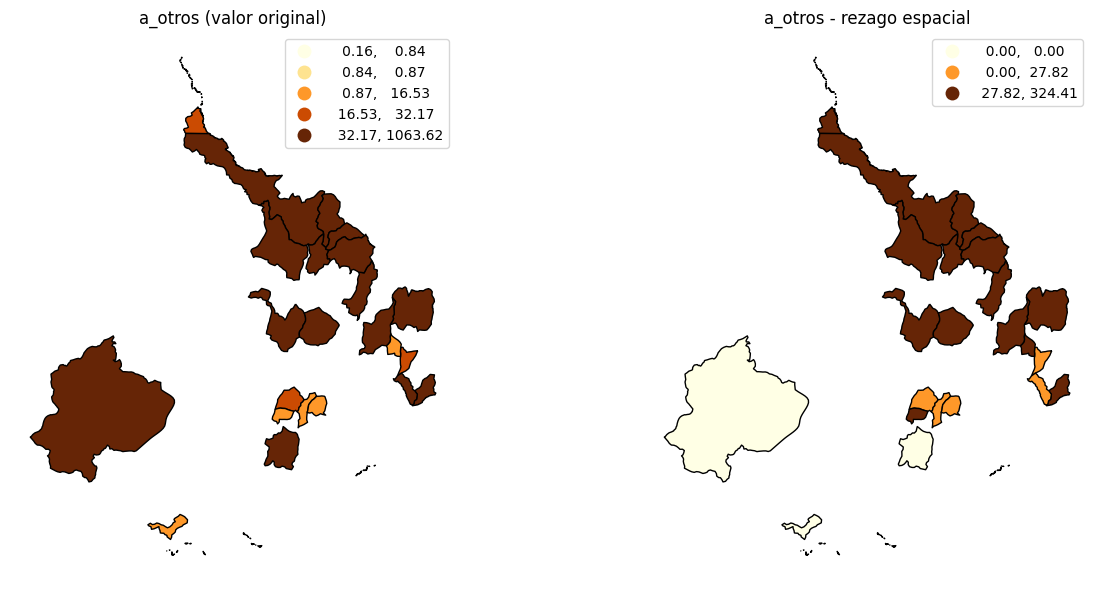

/usr/local/lib/python3.11/dist-packages/mapclassify/classifiers.py:1760: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self.bins = quantile(y, k=k)


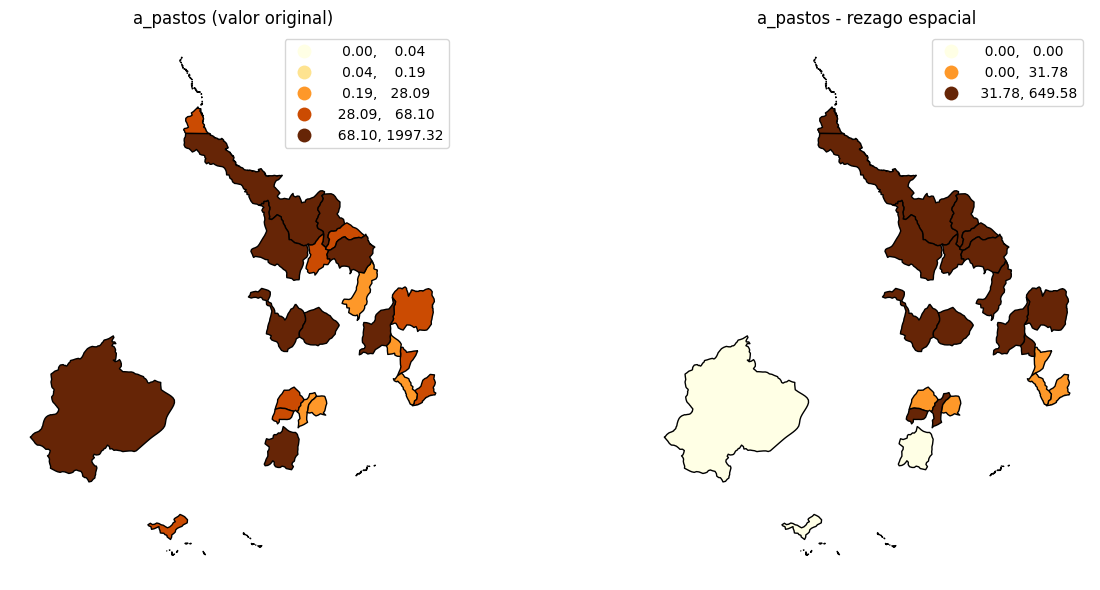

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
from libpysal.weights import Queen, lag_spatial
import mapclassify

# Filtramos las zonas con uso de plaguicidas
gdf = gpd.read_file("/content/drive/MyDrive/Analisis Geoespacial/Entrega_2/zonas_plaguicidas.geojson")
gdf = gdf.explode(index_parts=False).reset_index(drop=True)
gdf_si = gdf[gdf['usoplaguic'] == 'Si'].reset_index(drop=True)

# Variables a analizar
variables = ['a_aguas', 'a_cultivos', 'a_otros', 'a_pastos']

# Crear matriz de vecindad Queen
w_queen = Queen.from_dataframe(gdf_si)
w_queen.transform = 'r'

# Calcular rezagos espaciales
for var in variables:
    gdf_si[f'w_{var}'] = lag_spatial(w_queen, gdf_si[var])

# Función de gráfico
def graficar_comparacion(gdf, var):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    gdf.plot(column=var, cmap='YlOrBr', scheme='quantiles', k=5, edgecolor='black', legend=True, ax=axs[0])
    axs[0].set_title(f'{var} (valor original)')
    axs[0].axis('off')

    gdf.plot(column=f'w_{var}', cmap='YlOrBr', scheme='quantiles', k=5, edgecolor='black', legend=True, ax=axs[1])
    axs[1].set_title(f'{var} - rezago espacial')
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

# Graficar cada variable y su rezago
for var in variables:
    graficar_comparacion(gdf_si, var)


## **Calcular Moran’s**

In [12]:
!pip install libpysal esda --quiet
import geopandas as gpd
import pandas as pd
from libpysal.weights import Queen
from esda.moran import Moran

# Leer archivo
gdf = gpd.read_file("/content/drive/MyDrive/Analisis Geoespacial/Entrega_2/zonas_plaguicidas.geojson")
gdf = gdf.explode(index_parts=False).reset_index(drop=True)
gdf_si = gdf[gdf['usoplaguic'] == 'Si'].reset_index(drop=True)

# Crear matriz de pesos Queen
w_queen = Queen.from_dataframe(gdf_si)
w_queen.transform = 'r'

# Calcular Moran's I
variables = ['a_total', 'a_aguas', 'a_cultivos', 'a_otros', 'a_pastos']
moran_results = []

for var in variables:
    values = gdf_si[var].fillna(0).values
    moran = Moran(values, w_queen)
    moran_results.append({
        'Variable': var,
        "Moran's I": round(moran.I, 4),
        'p-value': round(moran.p_sim, 4),
        'Significativo (p<0.05)': moran.p_sim < 0.05
    })

# Mostrar resultados
moran_df = pd.DataFrame(moran_results)
print(moran_df)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 8.1 MB/s eta 0:00:00
('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an isla

/tmp/ipython-input-12-4144011007.py:13: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = Queen.from_dataframe(gdf_si)
/usr/local/lib/python3.11/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 59 disconnected components.
 There are 55 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 50, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74.
  W.__init__(self, neighbors, ids=ids, **kw)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.8/322.8 kB 21.6 MB/s eta 0:00:00


/tmp/ipython-input-15-2576892696.py:17: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = Queen.from_dataframe(gdf_si)
/usr/local/lib/python3.11/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 59 disconnected components.
 There are 55 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 50, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING:

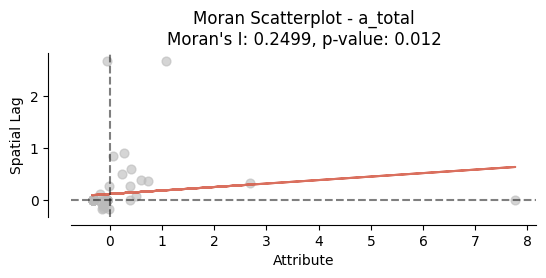

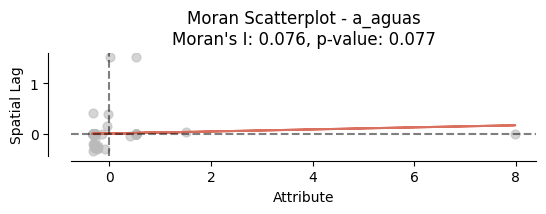

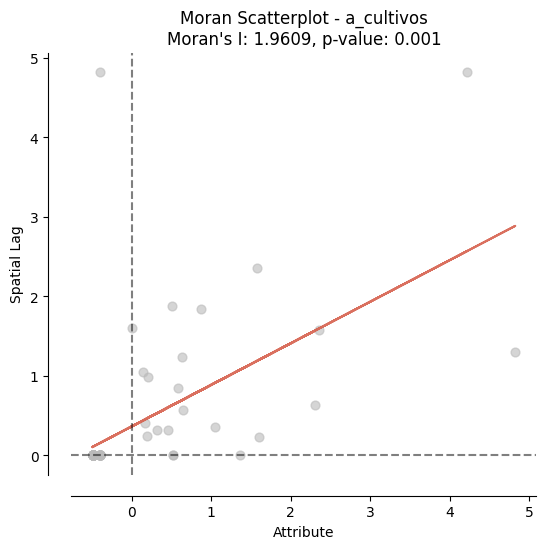

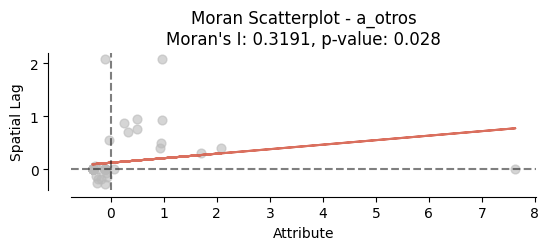

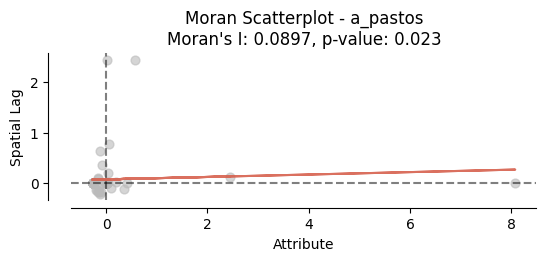

In [15]:
!pip install libpysal esda matplotlib --quiet
!pip install splot --quiet

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from libpysal.weights import Queen
from esda.moran import Moran
from splot.esda import moran_scatterplot  # para graficar

# Leer y preparar los datos
gdf = gpd.read_file("/content/drive/MyDrive/Analisis Geoespacial/Entrega_2/zonas_plaguicidas.geojson")
gdf = gdf.explode(index_parts=False).reset_index(drop=True)
gdf_si = gdf[gdf['usoplaguic'] == 'Si'].reset_index(drop=True)

# Matriz de pesos Queen
w_queen = Queen.from_dataframe(gdf_si)
w_queen.transform = 'r'

# Variables a analizar
variables = ['a_total', 'a_aguas', 'a_cultivos', 'a_otros', 'a_pastos']

# Graficar scatterplot para cada variable
for var in variables:
    values = gdf_si[var].fillna(0).values
    moran = Moran(values, w_queen)

    fig, ax = plt.subplots(figsize=(6, 6))
    moran_scatterplot(moran, ax=ax)
    ax.set_title(f"Moran Scatterplot - {var}\nMoran's I: {round(moran.I, 4)}, p-value: {round(moran.p_sim, 4)}")
    plt.show()


/tmp/ipython-input-16-1536013534.py:15: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = Queen.from_dataframe(gdf_si)
/usr/local/lib/python3.11/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 59 disconnected components.
 There are 55 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 50, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING:

/usr/local/lib/python3.11/dist-packages/esda/moran.py:1350: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


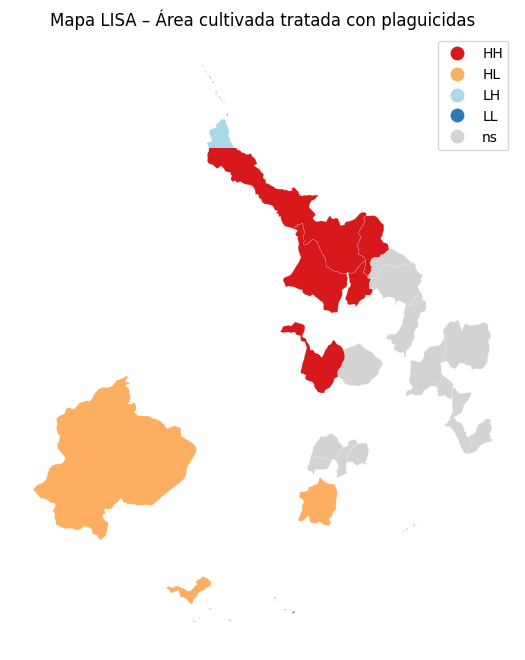

In [16]:
!pip install geopandas libpysal esda splot --quiet

import geopandas as gpd
import matplotlib.pyplot as plt
from libpysal.weights import Queen
from esda.moran import Moran_Local
from splot.esda import lisa_cluster

# 1. Cargar y preparar los datos
gdf = gpd.read_file("/content/drive/MyDrive/Analisis Geoespacial/Entrega_2/zonas_plaguicidas.geojson")
gdf = gdf.explode(index_parts=False).reset_index(drop=True)
gdf_si = gdf[gdf['usoplaguic'] == 'Si'].reset_index(drop=True)

# 2. Crear matriz de vecindad Queen estandarizada por filas
w_queen = Queen.from_dataframe(gdf_si)
w_queen.transform = 'r'

# 3. Calcular LISA (Local Moran's I) para a_cultivos
y = gdf_si['a_cultivos'].fillna(0).values
lisa = Moran_Local(y, w_queen)

# 4. Agregar los resultados al GeoDataFrame
gdf_si['lisa_cluster'] = lisa.q
gdf_si['signif'] = lisa.p_sim < 0.05

# 5. Graficar mapa LISA
fig, ax = plt.subplots(1, figsize=(8, 8))
lisa_cluster(lisa, gdf_si, p=0.05, ax=ax)
plt.title("Mapa LISA – Área cultivada tratada con plaguicidas")
plt.show()



/tmp/ipython-input-17-2090001294.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_filtrado["centroide"] = gdf_filtrado.geometry.centroid


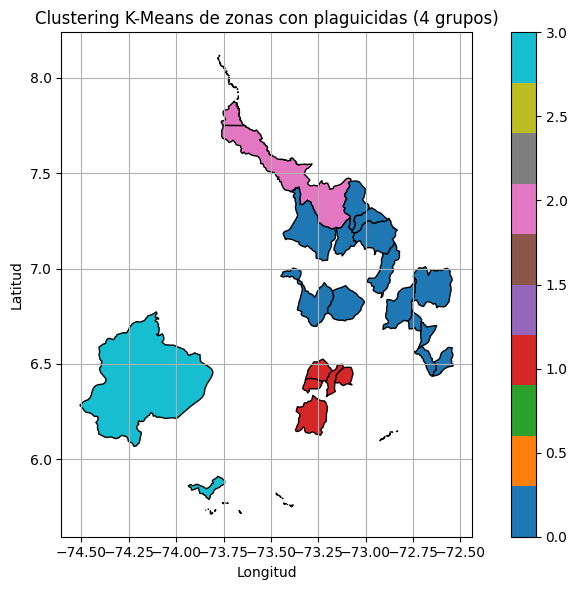


Número de zonas por cluster (uso de plaguicidas):
cluster
0    14
1     6
2     3
3     4
Name: count, dtype: int64


In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Paso 1: Leer archivo GeoJSON
gdf = gpd.read_file("/content/drive/MyDrive/Analisis Geoespacial/Entrega_2/zonas_plaguicidas.geojson")

# Paso 2: Asegurar sistema de coordenadas (WGS 84)
gdf = gdf.to_crs(epsg=4326)

# Paso 3: Filtrar zonas con uso de plaguicidas
gdf_filtrado = gdf[gdf["usoplaguic"] == "Si"].copy()

# Paso 4: Calcular centroides (para obtener coordenadas)
gdf_filtrado["centroide"] = gdf_filtrado.geometry.centroid
gdf_filtrado["lon"] = gdf_filtrado["centroide"].x
gdf_filtrado["lat"] = gdf_filtrado["centroide"].y

# Paso 5: Preparar coordenadas para clustering
X = gdf_filtrado[["lon", "lat"]].values

# Paso 6: Aplicar KMeans
n_clusters = 4  # Puedes cambiar este número según lo que quieras analizar
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
gdf_filtrado["cluster"] = kmeans.fit_predict(X)

# Paso 7: Visualizar resultados
fig, ax = plt.subplots(figsize=(8, 6))
gdf_filtrado.plot(ax=ax, column="cluster", cmap="tab10", legend=True, edgecolor='black')
plt.title(f"Clustering K-Means de zonas con plaguicidas ({n_clusters} grupos)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.tight_layout()
plt.show()

# Paso 8: Tabla resumen
print("\nNúmero de zonas por cluster (uso de plaguicidas):")
print(gdf_filtrado["cluster"].value_counts().sort_index())


In [18]:
# 1. Instalar paquetes necesarios
!pip install libpysal spreg --quiet

# 2. Importar librerías
import geopandas as gpd
import pandas as pd
import numpy as np
from libpysal.weights import Queen
from spreg import ML_Lag

# 3. Cargar el archivo GeoJSON
gdf = gpd.read_file("/content/drive/MyDrive/Analisis Geoespacial/Entrega_2/zonas_plaguicidas.geojson")

# 4. Corregir geometrías multiparte (si existen)
gdf = gdf.explode(index_parts=False).reset_index(drop=True)

# 5. Filtrar zonas con uso de plaguicidas
gdf_si = gdf[gdf['usoplaguic'] == 'Si'].reset_index(drop=True)

# 6. Crear matriz de pesos espaciales tipo Queen (normalizada por filas)
w = Queen.from_dataframe(gdf_si)
w.transform = 'r'

# 7. Definir variable dependiente y variables independientes
# Variable dependiente: a_total
# Variables independientes: a_aguas, a_cultivos, a_otros, a_pastos
y = gdf_si['a_total'].values.reshape(-1, 1)
X = gdf_si[['a_aguas', 'a_cultivos', 'a_otros', 'a_pastos']].fillna(0).values

# 8. Ajustar modelo SAR (Spatial Autoregressive Lag Model)
model = ML_Lag(y, X, w=w, name_y='a_total', name_x=['a_aguas', 'a_cultivos', 'a_otros', 'a_pastos'], name_w='Queen', name_ds='Plaguicidas_Santander')

# 9. Mostrar resumen del modelo
print(model.summary)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING:

/tmp/ipython-input-18-2220232938.py:21: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf_si)
/usr/local/lib/python3.11/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 59 disconnected components.
 There are 55 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 50, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74.
  W.__init__(self, neighbors, ids=ids, **kw)


In [19]:
!pip install libpysal spreg --quiet

import geopandas as gpd
import pandas as pd
from libpysal.weights import Queen
from spreg import GM_Error_Het

# 1. Cargar datos
gdf = gpd.read_file("/content/drive/MyDrive/Analisis Geoespacial/Entrega_2/zonas_plaguicidas.geojson")
gdf = gdf.explode(index_parts=False).reset_index(drop=True)

# 2. Filtrar por polígonos con uso de plaguicidas
gdf_si = gdf[gdf['usoplaguic'] == 'Si'].reset_index(drop=True)

# 3. Crear matriz de vecindad Queen
w_queen = Queen.from_dataframe(gdf_si)
w_queen.transform = 'r'  # Estandarizar por filas

# 4. Definir variables
# Variable dependiente (por ejemplo: a_cultivos)
y = gdf_si[['a_cultivos']].values

# Variables explicativas
X = gdf_si[['a_aguas', 'a_otros', 'a_pastos']].values

# 5. Ajustar modelo CAR (Error espacial heterocedástico)
modelo_car = GM_Error_Het(y, X, w=w_queen, name_y='a_cultivos',
                          name_x=['a_aguas', 'a_otros', 'a_pastos'],
                          name_w='Queen')

# 6. Imprimir resultados
print(modelo_car.summary)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING:

/tmp/ipython-input-19-1882514693.py:16: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = Queen.from_dataframe(gdf_si)
/usr/local/lib/python3.11/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 59 disconnected components.
 There are 55 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 50, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74.
  W.__init__(self, neighbors, ids=ids, **kw)
